Automatically created module for IPython interactive environment


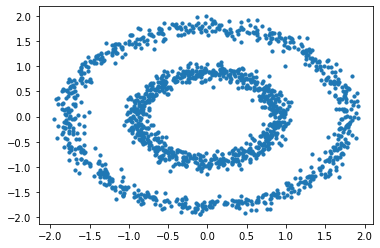

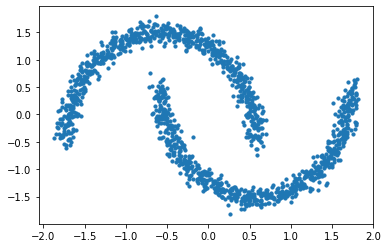

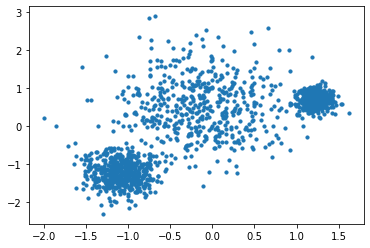

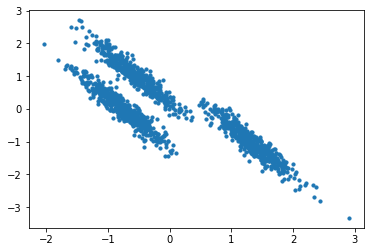

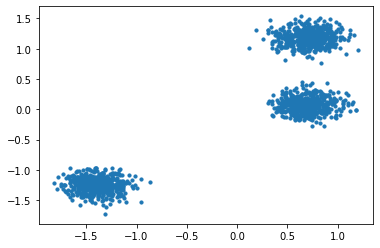

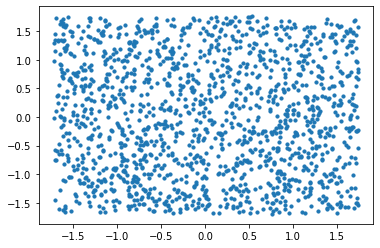

None


In [21]:
%matplotlib inline
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples =1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
#plt.figure(figsize=(9 * 2 + 3, 13))
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    plt.scatter(X[:, 0], X[:, 1],s=10)
    plt.show()
#np.set_printoptions(threshold=5)


In [ ]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    plt.scatter(X[:, 0], X[:, 1],s=10)
    plt.show()

In [1]:
import numpy as np
import scipy
# example of generating a small classification dataset
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# summarize
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(100, 2) (100,)
[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


In [2]:

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
	# estimate parameters
	mu = np.mean(data)
	sigma = np.std(data)
	print(mu, sigma)
	# fit distribution
	dist = scipy.stats.norm(mu, sigma)
	return dist

In [3]:

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)


(50, 2) (50, 2)


In [4]:
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

0.5 0.5


In [5]:

# # create PDFs for y==0
# X1y0 = fit_distribution(Xy0[:, 0])
# X2y0 = fit_distribution(Xy0[:, 1])
# # create PDFs for y==1
# X1y1 = fit_distribution(Xy1[:, 0])
# X2y1 = fit_distribution(Xy1[:, 1])

In [6]:
# create PDFs for y==0
distX1y0 = fit_distribution(Xy0[:, 0])
distX2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
distX1y1 = fit_distribution(Xy1[:, 0])
distX2y1 = fit_distribution(Xy1[:, 1])

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


In [7]:
def probability(X, prior, dist1, dist2):
	return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

In [14]:
z=[]
for i in range(0,100):
    Xsample, ysample = X[i],y[i]
    py0 = probability(Xsample, priory0, distX1y0, distX2y0)
    py1 = probability(Xsample, priory1, distX1y1, distX2y1)
    z.append(ysample)
#     print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
#     print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
#     print('Truth: y=%d' % ysample)

In [18]:
z[:5]

[0, 1, 0, 0, 1]